<a href="https://colab.research.google.com/github/benthecoder/face_recognition_w_Python/blob/master/Face_recognition_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing face_recognition library

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=827caf296ea08e0dc2001c679fff7648f17bca147757cffae10dadf2748e51a9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


### A Brief explanation of how the face recognition library works

For each image or face, it generates 120 measurements, which are numbers which corresponding to an encoding for a particular face. The trick is for different faces, the measurments differ as well. With that, it's possible to have a face recognition model to detect known faces from unknown faces. This can be done by having a folder for known faces which are pictures already recognised by the model through the encoding, and then comparing the encodings to determine whether the new face is a known/unknown face.

Thus, with a distance measurement or classifier is used to calculate the distance between the encodings, ergo a larger difference equate to a different unknown face, while a small difference equate to a known face. 

### Creating folder for known images


In [ ]:
!mkdir known
!wget https://media.wired.com/photos/597b8cdfb28a665d24d4a91c/master/w_2560%2Cc_limit/ELONMUSK-TA.jpg -O known/ElonMusk.jpg
!wget https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3OTcxMTUwODQxNTM1/steve-jobs--david-paul-morrisbloomberg-via-getty-images.jpg -O known/SteveJobs.jpg
!wget https://cdn.britannica.com/s:300x300/47/188747-050-1D34E743/Bill-Gates-2011.jpg -O known/BillGates.jpg

--2020-08-13 06:48:38--  https://media.wired.com/photos/597b8cdfb28a665d24d4a91c/master/w_2560%2Cc_limit/ELONMUSK-TA.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298754 (292K) [image/jpeg]
Saving to: ‘known/ElonMusk.jpg’

known/ElonMusk.jpg  100%[===================>] 291.75K  --.-KB/s    in 0.05s   

2020-08-13 06:48:39 (5.33 MB/s) - ‘known/ElonMusk.jpg’ saved [298754/298754]

--2020-08-13 06:48:41--  https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3OTcxMTUwODQxNTM1/steve-jobs--david-paul-morrisbloomberg-via-getty-images.jpg
Resolving www.biography.com (www.biography.com)... 151.101.2.98, 151.101.66.98, 151.101.130.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.2.98|:443... connected.
HTTP request sent, awaiting response... 2

### Creating folder for unknown images

In [ ]:
!mkdir unknown
!wget https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5c76b7d331358e35dd2773a9%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D0%26cropX2%3D4401%26cropY1%3D0%26cropY2%3D4401 -O unknown/1.jpg
!wget https://www.incimages.com/uploaded_files/image/1920x1080/getty_543265518_200013352000928070_414162.jpg -O unknown/2.jpg
!wget https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O unknown/3.jpg
!wget https://www.incimages.com/uploaded_files/image/1920x1080/getty_96211512_200014742000928041_418201.jpg -O unknown/4.jpg

--2020-08-13 06:48:49--  https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5c76b7d331358e35dd2773a9%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D0%26cropX2%3D4401%26cropY1%3D0%26cropY2%3D4401
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19728 (19K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  19.27K  --.-KB/s    in 0.01s   

2020-08-13 06:48:49 (1.52 MB/s) - ‘unknown/1.jpg’ saved [19728/19728]

--2020-08-13 06:48:51--  https://www.incimages.com/uploaded_files/image/1920x1080/getty_543265518_200013352000928070_414162.jpg
Resolving www.incimages.com (www.incimages.com)... 151.101.2.59, 151.101.66.59, 151.101.130.59, ...
Connecting to www.incimages.com (www.incimages.co

### Importing libraries and packages

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

### Resizing images 

In [ ]:
def read_img(path): 
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h* ratio)
  return cv2.resize(img, (width, height))

### Encoding for known faces

`face_encodings` 
* function that generates encodings for a given image

In [ ]:
known_encodings = []
known_names = []
known_dir = 'known' # directory name

# iterating through each images
for file in os.listdir(known_dir): 
  img = read_img(known_dir + '/' + file) 
  img_enc = face_recognition.face_encodings(img)[0] # 0 as there is only one face
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0]) # removing .jpg

### Encoding for unknown faces

processing 1.jpg
processing 2.jpg


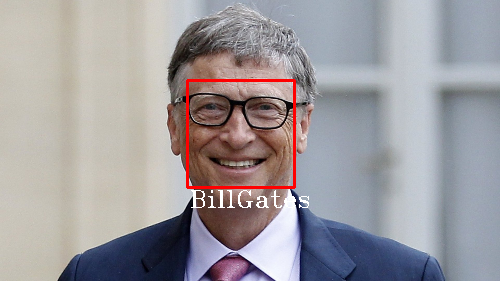

processing 3.jpg


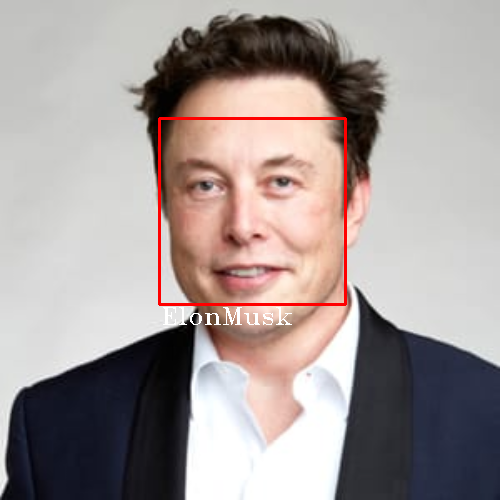

processing 4.jpg


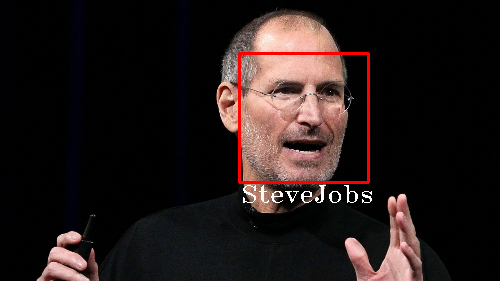

In [ ]:
unknown_dir = 'unknown'

for file in os.listdir(unknown_dir):
  print("processing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0] 

  # comparing encoding of unknown vs known with compare_faces
  results = face_recognition.compare_faces(known_encodings, img_enc)
  
  # print(face_recognition.face_distance(known_encodings, img_enc))

  # draw on top of image with name
  for i in range(len(results)): 
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (255, 255, 255), 1)
      cv2_imshow(img)

  # # True or False
  # print(results) # shows encoding values only